In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #to build chart
import seaborn
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('cost_revenue_clean.csv') #data is object that hold datas

In [3]:
data

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [4]:
data.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


so, we can see we have the average of production budget is 32900000

In [5]:
3.290e7

32900000.0

In [6]:
print("Any missing value?", data.isnull().values.any())

Any missing value? False


Plotting I use : Scatter Plot

In [7]:
x = DataFrame(data, columns=['production_budget_usd'])
y = DataFrame(data, columns=['worldwide_gross_usd'])

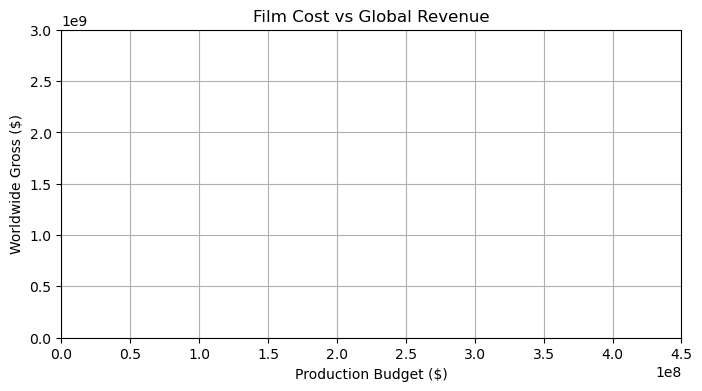

In [8]:
plt.figure(figsize=(8,4)) #size chart
plt.scatter(x, y, alpha=0.3) #alpha=transparency #use scatter easy to spot outliersplt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Film Cost vs Global Revenue')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.grid()
plt.show()

In [9]:
max_production_budget = data['production_budget_usd'].max()
movie_title = data.loc[data['production_budget_usd'] == max_production_budget, 'Movie Title'].values[0]

print("Movie with the highest production budget and revenue:", movie_title)


KeyError: 'production_budget_usd'

for example chart above, the outliers made an enormous production cost and made a lot of money. That one is Avatar. We also can start understand about Relationship or Potential Relationship between movie budget and movie revenue. Upwards trend. Most films actually small production < 1 million. Higher budget films appear to have higher revenue.

In [ ]:
data.corr(numeric_only=True)

The correlation between "production_budget_usd" and "worldwide_gross_usd" is 0.741383. This indicates a moderately strong positive correlation between the two variables. As the production budget increases, there is a tendency for the worldwide gross to also increase. The value of 0.741383 suggests a fairly strong positive linear relationship between the production budget and worldwide gross.

In summary, the correlation coefficients indicate a significant positive correlation between the production budget and worldwide gross. This means that as the production budget increases, there is a tendency for the worldwide gross to increase as well.

In [ ]:
correlations = data.corr(numeric_only=True)
seaborn.heatmap(correlations)
plt.show()

Feature selection for univariate feature selection used in this project is by using ANOVA Test.

Ho: There is no significant difference between mean of production budget and worldwide gross.

Ha : There is difference between mean of production budget and worldwide gross.

Error bars of two groups in a bar plot below overlap by more than a certain threshold (such as 25%), thus, it suggests that the difference between the means or values represented by the bars is not statistically significant.

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
seaborn.barplot(x='production_budget_usd', y='worldwide_gross_usd', data=data, color="pink")
plt.title('Film Cost vs Global Revenue')
plt.show()

In [ ]:
production_budget = data["production_budget_usd"]
worldwide_gross = data["worldwide_gross_usd"]
statistic, p_value = stats.f_oneway(production_budget, worldwide_gross) # Perform the ANOVA test
print("F-statistic:", statistic)
print("p-value:", p_value)

Result obtained for F-statistic measured that ratio of variation between production budget and worlwide gross is 619.597

For p-value, we obtain 8.97e-133 which is near to zero.

Thus, since p-value is near to zero, it suggest strong evidence that Ho is true where There is no significant difference between mean of production budget and worldwide gross.

In summary, the ANOVA test result indicates a strong evidence of a significant difference between the production budget and worldwide gross, with a very small p-value and a large F-statistic.

Algorithm used in predictive model : Linear Regression

In [ ]:
regression = LinearRegression()
regression.fit(x, y)

how i validate my data:

Train-Test Split: Split your data into a training set and a separate test set. Train your linear regression model using the training set and evaluate its performance on the test set using appropriate metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared.

In [ ]:
X = data['production_budget_usd'].values.reshape(-1, 1)
y = data['worldwide_gross_usd'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
plt.figure(figsize=(8,4)) #size chart
plt.scatter(X_test, y_test, alpha=0.3, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
coefficients = np.polyfit(X.flatten(), y.flatten(), 1)
trendline = np.poly1d(coefficients)
plt.plot(X.flatten(), trendline(X.flatten()), color='blue', label='Trend Line')
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.grid()
plt.legend()
plt.show()

trend line represent tendency pattern of long term data.

Slope coefficient:

In [ ]:
regression.coef_

so the impact of features to my model is I measured by magnitude of coefficients. From the result obtain, I got positive coefficient which means when production budget increase, the worldwide gross also increase. In the other word, result shows positive relationship between budget and revenue. each dollar we spend on producing movie, we should get around 3.1 dollar revenue in return.

Intercept:

In [ ]:
regression.intercept_

movie with a budget of 0, lose over 7 mill dollar and it is less realistic.

Evaluating and analyzing:

In [ ]:
regression.score(x, y) #calculate r^2 to find best fit

the result suggests that the film's budget can explain approximately 55% of the variation observed in worldwide earnings. It indicates that there is a moderate relationship or association between the film's budget and its revenue.

This information can be useful in understanding the influence of the budget on the film's revenue and assessing the significance of budget as a predictor. However, it does not provide a comprehensive understanding of all factors that contribute to the film's earnings. Other variables and factors, such as marketing, genre, release date, and audience reception, may also play a significant role in determining the film's success.

